In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
wine = load_wine()

In [71]:
X = wine.data
y = wine.target

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
X_train.shape

(124, 13)

In [86]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [87]:
cov = np.cov(X_train_scaled.T)
cov.shape

(13, 13)

In [88]:
eigen_values, eigen_vectors = np.linalg.eig(cov)
eigen_values

array([4.84026973, 2.62239872, 1.60174941, 0.81940698, 0.75097347,
       0.62779062, 0.50535452, 0.10961131, 0.13854695, 0.34257389,
       0.29020353, 0.20975712, 0.2470548 ])

In [89]:
eigen_sum = np.sum(eigen_values)

In [90]:
var_exp = [i/eigen_sum for i in sorted(eigen_values, reverse=True)]
var_exp

[0.3693257923332368,
 0.20009618010500352,
 0.12221785187327647,
 0.06252298899773759,
 0.05730132592015432,
 0.04790213760989447,
 0.03855992934091411,
 0.02613932324484467,
 0.0221433218376316,
 0.01885095567306069,
 0.016005040723019965,
 0.010571510284898767,
 0.008363642056327085]

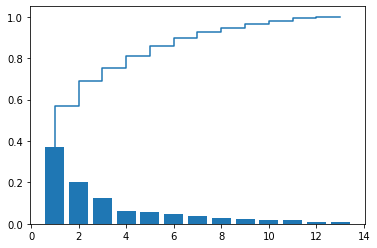

In [91]:
plt.bar(range(1, len(var_exp)+1), var_exp)
plt.step(range(1, len(var_exp)+1), np.cumsum(var_exp))
plt.show()

In [97]:
eigen_pairs = list(zip(eigen_values, eigen_vectors.T))

In [93]:
eigen_pairs_sorted = sorted(eigen_pairs, key = lambda x: x[0], reverse=True)

In [94]:
W = np.c_[eigen_pairs_sorted[0][1], eigen_pairs_sorted[1][1]]

In [95]:
PCA_X_train = X_train_scaled.dot(W)

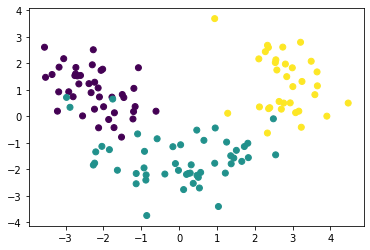

In [96]:
plt.scatter(PCA_X_train[:,0], PCA_X_train[:,1], c = y_train)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
logReg = LogisticRegression()
logReg.fit(PCA_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
def mesh_grid_visual(X, y, model, X_test = None, y_test = None):
    x0 = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100)
    x1 = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100)
    a,b = np.meshgrid(x0, x1)
    X_new = np.c_[a.ravel(), b.ravel()]
    predictions = model.predict(X_new)
    if "sklearn" in str(type(model)):
        decision = model.decision_function(X_new)
#         decision = np.max(model.decision_function(X_new), axis = 1)
    else:
        decision = model.decision(X_new)
    if len(np.unique(y)) > 2:
        decision = np.max(model.decision_function(X_new), axis = 1)
    
    plt.contourf(x0, x1, predictions.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.4)
    plt.contourf(x0, x1, decision.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.2)
    for yy in np.unique(y):
        plt.scatter(X[y == yy, 0], X[y==yy, 1], label = "Train:" + str(yy), marker = 'x')
        if isinstance(X_test, np.ndarray):
            plt.scatter(X_test[y_test == yy, 0], X_test[y_test == yy, 1], label = "Test: "+ str(yy), marker = 'o', s = 100, alpha = 1.0, linewidths=1, c = '', edgecolor = 'black')
            
    plt.legend(loc = 'upper left')

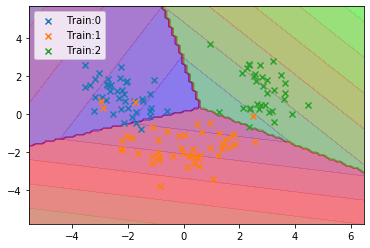

In [102]:
mesh_grid_visual(PCA_X_train, y_train, logReg)

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

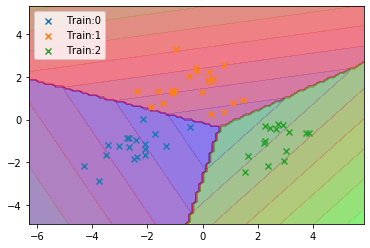

In [109]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
mesh_grid_visual(X_test_pca, y_test, lr)